In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from matplotlib import colors, ticker
import pandas as pd
import numpy as np
import scipy as sp
from astropy.table import Table
import astropy.units as u
import astropy.coordinates as coord
import arviz as az
import seaborn as sns

import kinesis as kn
import gapipes as gp

kn.set_mpl_style()

In [56]:
df = kn.data.load_hyades_dataset()
b_c_icrs = np.array([17.13924468, 41.23189102, 13.65416937])
b0 = b_c_icrs
rvec = df[['x','y','z']].values - b0[None]
r = np.linalg.norm(rvec, axis=1)
df_cl = df.loc[r<9]

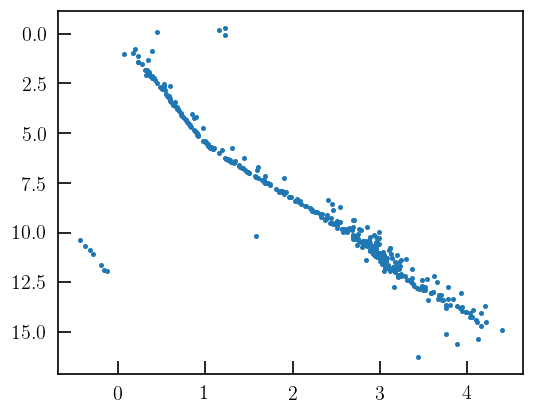

In [57]:
fig, ax = plt.subplots()
ax.scatter(df_cl['bp_rp'],df_cl['phot_g_mean_mag']+df_cl.g.distmod, s=4)
ax.invert_yaxis()

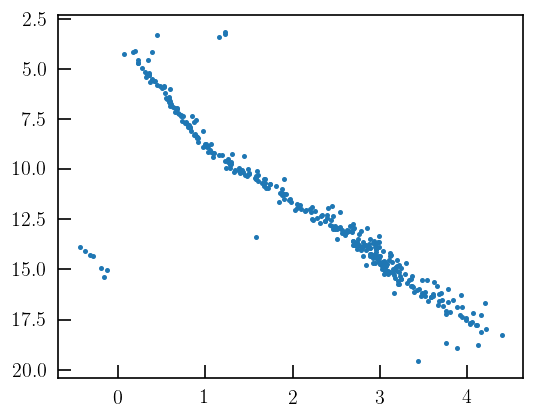

In [58]:
fig, ax = plt.subplots()
ax.scatter(df_cl['bp_rp'],df_cl['phot_g_mean_mag'], s=4)
ax.invert_yaxis()

In [59]:
from isochrones.mist import MIST_EvolutionTrack

In [60]:
mist_track = MIST_EvolutionTrack()

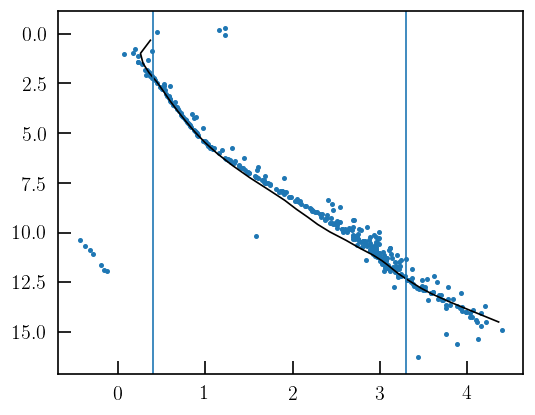

In [61]:
hy_track = mist_track.generate(np.logspace(-1,1), np.log10(680e6), 0.24)
fig, ax = plt.subplots()
ax.scatter(df_cl['bp_rp'],df_cl['phot_g_mean_mag']+df_cl.g.distmod, s=4)
ax.invert_yaxis()
ax.plot(hy_track['BP_mag']-hy_track['RP_mag'], hy_track['G_mag'],'k-');
ax.axvline(0.4)
ax.axvline(3.3)

In [62]:
cond = (df_cl['phot_g_mean_mag']+df_cl.g.distmod > 2.5) & (df_cl['bp_rp']>0.4) & (df_cl['bp_rp']<3.3)
print(cond.sum())

278


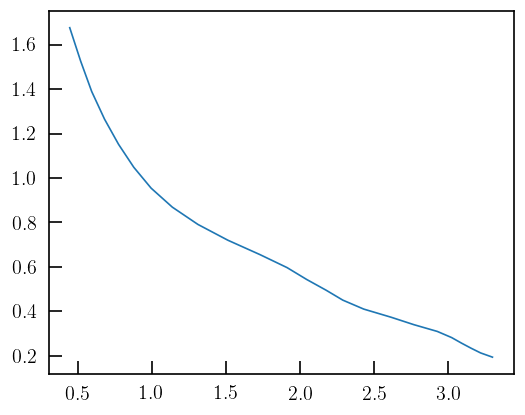

In [63]:
x, y = hy_track['BP_mag']-hy_track['RP_mag'], hy_track['mass']
x, y = x[(x>0.39) & (x<3.3)], y[(x>0.39) & (x<3.3)]
plt.plot(x, y);
from scipy import interpolate
bprp_to_mass = interpolate.interp1d(x, y, fill_value="extrapolate")

In [64]:
bprp_to_mass(df_cl['bp_rp'][cond]).sum(), bprp_to_mass(df_cl['bp_rp'][cond]).sum()*2.45

(162.26968587633948, 397.56073039703176)

In [69]:
import astropy.constants as c

(4*u.pc * 0.4**2 * 3 * (u.km/u.s)**2 / c.G).to(u.solMass)

<Quantity 446.41639898 solMass>